<a href="https://colab.research.google.com/github/ankitpyj/Machine_Learning/blob/main/DAY-1/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION with SKLEARN

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load Dataset

data = pd.read_csv("dataaa.csv")

X = data[['age', 'income']]      # input features (age, income)
y = data['target']               # output labels (0 or 1)

In [ ]:
# Scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train Logistic Regression

model = LogisticRegression()
model.fit(X_scaled, y)


LogisticRegression()

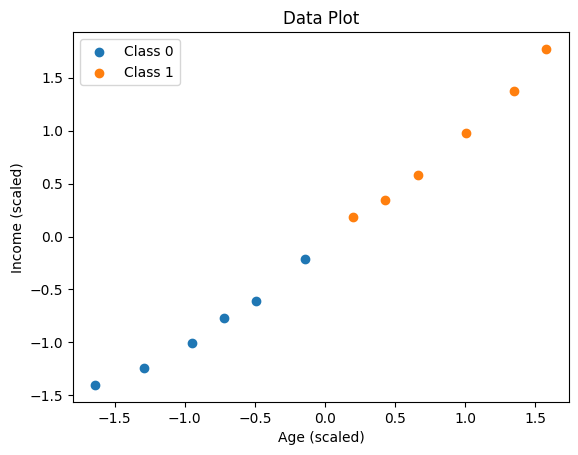

In [ ]:
# Plot the DATA points
plt.scatter(X_scaled[y==0][:,0], X_scaled[y==0][:,1], label="Class 0")
plt.scatter(X_scaled[y==1][:,0], X_scaled[y==1][:,1], label="Class 1")

plt.xlabel("Age (scaled)")
plt.ylabel("Income (scaled)")
plt.legend()
plt.title("Data Plot")
plt.show()

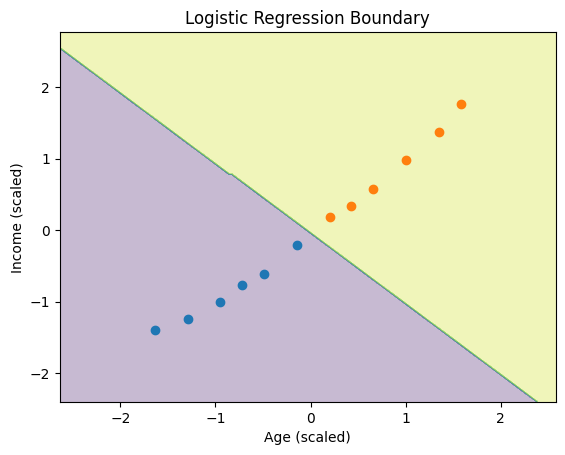

In [ ]:
# Plot the DECISION boundary
xx, yy = np.meshgrid(
    np.linspace(X_scaled[:,0].min()-1, X_scaled[:,0].max()+1, 200),
    np.linspace(X_scaled[:,1].min()-1, X_scaled[:,1].max()+1, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_scaled[y==0][:,0], X_scaled[y==0][:,1])
plt.scatter(X_scaled[y==1][:,0], X_scaled[y==1][:,1])

plt.xlabel("Age (scaled)")
plt.ylabel("Income (scaled)")
plt.title("Logistic Regression Boundary")
plt.show()

# **LOGISTIC REGERESSION**

w(new​)=w(old)​+η​∑(y−σ(wx))x /n


Symbol	Meaning
*  w	          Weight vector (model parameters)

*   x	          Input features

*  y            Actual label (0 or 1)

*  σ            Sigmoid function

*  n            Number of samples

*  (y − σ(wx))  Prediction error


In [ ]:
# Sample dataset
X = [
    [1,0.44, 0.33],
    [1,0.50, 0.37],
    [1,0.90, 0.83],
    [1,1.00, 1.00]
]

y = [0, 0, 1, 1]

# Initialize weights
w = [0, 0, 0]

eta = 0.1
epochs = 1000


In [ ]:
import math

def sigmoid(z):
    return 1 / (1 + math.exp(-z))


In [ ]:
# z =  w1​x1​+w2​x2​+…

def dot(w, x):
    total = 0
    for j in range(len(w)):
        total += w[j] * x[j]
    return total



In [ ]:
def update_weights(X, y, w, eta):      # gradient   ​∑(y−y^)x /n

    n = len(X)

    gradients = [0] * len(w)

    for i in range(n):

        # 𝑦^ = σ(wx)   prediction
        z = dot(w, X[i])         # z= wx
        y_hat = sigmoid(z)


        # y - y^   ERROR
        error = y[i] - y_hat

        # ERROR * x
        for j in range(len(w)):
            gradients[j] += error * X[i][j]

    # Weight update

    for j in range(len(w)):
        w[j] += eta * (gradients[j] / n)

    return w

In [ ]:
# Training

for _ in range(epochs):
    w = update_weights(X, y, w, eta)

print("Final weights:", w)

Final weights: [-4.442857712965611, 2.8488448853202724, 4.214930935109378]


In [ ]:
# prediction

def predict(x, w):
    return 1 if sigmoid(dot(w, x)) >= 0.5 else 0

for x in X:
    print(predict(x, w))

0
0
1
1


# LOGISTICS REGRESSION IN MUTI DIMENSION (SOFTMAX FXN)



STEP 1 — INPUT Data (make classification)  
Input features (X) → information
Output label (y) → correct class

STEP 2 — Split Data (Train & Test)                                              
STEP 3 — Model Creation                                                         
STEP 4 — Training the Model (fit())                                             
STEP 5 — Probability Prediction                                                 
STEP 6 — Final Prediction                                                       
STEP 7 — Accuracy Calculation                      

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_classes=3,
                           n_clusters_per_class=1,
                           n_redundant=0,
                           class_sep=1.5,
                           random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs'
)

model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [11]:
probabilities = model.predict_proba(X_test)

print(probabilities[:5])

[[9.75711315e-01 2.00621574e-02 4.22652762e-03]
 [1.02595132e-03 1.42499054e-03 9.97549058e-01]
 [7.50155365e-02 1.02144356e-04 9.24882319e-01]
 [3.11674308e-03 1.71871075e-03 9.95164546e-01]
 [2.03413761e-01 7.96391461e-01 1.94777920e-04]]


In [12]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[0 2 2 2 1]


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99


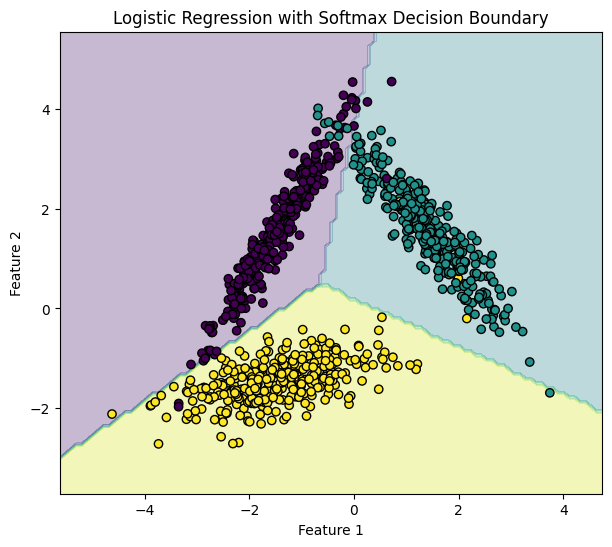

In [14]:
plt.figure(figsize=(7,6))

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict probabilities for each class on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# background regions
plt.contourf(xx, yy, Z, alpha=0.3)

# actual data points
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression with Softmax Decision Boundary")

plt.show()